In [1]:
# Mounting the Google Drive 
from google.colab import drive
drive.mount('/content/gdrive')

# Setting my input location to the Google Colab
%cd /content/gdrive/My Drive/DIS

# Displaying contents in the location
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/DIS
HW1  Project1  wolves.png


In [2]:
#importing all the necessary libraries and tools
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt

In [3]:
# Defining function 'Difference_gray_scale' for finding the neighbors and then calculating the differences of a Grayscale image
def Difference_gray_scale(neighbor):
  height = W_Image_gray.shape[0]
  width = W_Image_gray.shape[1]
  Img_Arr = np.array(W_Image_gray, dtype = 'int32')   # converted the image to a Numpy Array
  Diff = np.zeros((height,width), dtype = 'int32')    # Creating an array with zeros for the difference matrix
  
  for i in range (0,height):
    for j in range (0,width):
      if neighbor == 'P_Le':             # (x,y) & (x,y-1)
        if j == 0:
          Diff[i][j] = 0                 # assumed the value of border pixels as 0
        else:
          Diff[i][j] = (Img_Arr[i][j] - Img_Arr[i][j-1])**2
      if neighbor == 'P_R':             # (x,y) & (x,y+1)
        if j == (width-1):
          Diff[i][j] = 0
        else:
          Diff[i][j] = (Img_Arr[i][j] - Img_Arr[i][j+1])**2
      if neighbor == 'P_U':             # (x,y) & (x-1,y):
        if i == 0:
          Diff[i][j] = 0
        else: 
          Diff[i][j] = (Img_Arr[i][j] - Img_Arr[i-1][j])**2
      if neighbor == 'P_Lo':            # (x,y) & (x+1,y)
        if i == (height-1):
          Diff[i][j] = 0
        else: 
          Diff[i][j] = (Img_Arr[i][j] - Img_Arr[i+1][j])**2
      if neighbor == 'P_UL':            # (x,y) & (x-1,y-1)
        if((j == 0) or (i== 0)):
          Diff[i][j] = 0
        else:
          Diff[i][j] = (Img_Arr[i][j] - Img_Arr[i-1][j-1])**2
      if neighbor == 'P_UR':            # (x,y) & (x-1,y+1)
        if((i == 0) or (j == width-1)):
          Diff[i][j] = 0
        else:
          Diff[i][j] = (Img_Arr[i][j] - Img_Arr[i-1][j+1])**2
      if neighbor == 'P_LL':            # (x,y) & (x+1,y-1)
        if((i == height-1) or (j == 0)):
          Diff[i][j]  = 0
        else:
          Diff[i][j] = (Img_Arr[i][j] - Img_Arr[i+1][j-1])**2
      if  neighbor == 'P_LR':           # (x,y) & (x+1,y+1)
        if((i== height-1) or (j == width-1)):
          Diff[i][j] = 0
        else:
          Diff[i][j] = (Img_Arr[i][j] - Img_Arr[i+1][j+1])**2       


  return Diff    #returning the array of difference values

In [4]:
# Defining function 'Difference_3channel' for finding the neighbors and then calculating the differences for image with 3 channels (RGB,HSV & Lab)
def Difference_3channel(Input_Image,neighbor):
  height = Input_Image.shape[0]
  width = Input_Image.shape[1]
  channel_1 = np.array((Input_Image[:,:,0]), dtype = 'int32')   # Converted the each channel of the image to a Numpy Array
  channel_2 = np.array((Input_Image[:,:,1]), dtype = 'int32')
  channel_3 = np.array((Input_Image[:,:,2]), dtype = 'int32')  
  Diff = np.zeros((height,width), dtype = 'int32')              # Creating an array with zeros for the difference matrix

  for i in range (0,height):
    for j in range (0,width):
      if neighbor == 'P_Le':             # (x,y) & (x,y-1)
        if j == 0:
          Diff[i][j] = 0
        else:
          Diff[i][j] = (channel_1[i][j] - channel_1[i][j-1])**2 + (channel_2[i][j] - channel_2[i][j-1])**2 + (channel_3[i][j] - channel_3[i][j-1])**2
      if neighbor == 'P_R':             # (x,y) & (x,y+1)
        if j == (width-1):
          Diff[i][j] = 0
        else:
          Diff[i][j] = (channel_1[i][j] - channel_1[i][j+1])**2 + (channel_2[i][j] - channel_2[i][j+1])**2 + (channel_3[i][j] - channel_3[i][j+1])**2
      if neighbor == 'P_U':             # (x,y) & (x-1,y):
        if i == 0:
          Diff[i][j] = 0
        else: 
          Diff[i][j] = (channel_1[i][j] - channel_1[i-1][j])**2 + (channel_2[i][j] - channel_2[i-1][j])**2 + (channel_3[i][j] - channel_3[i-1][j])**2
      if neighbor == 'P_Lo':            # (x,y) & (x+1,y)
        if i == (height-1):
          Diff[i][j] = 0
        else: 
          Diff[i][j] = (channel_1[i][j] - channel_1[i+1][j])**2 + (channel_2[i][j] - channel_2[i+1][j])**2 + (channel_3[i][j] - channel_3[i+1][j])**2
      if neighbor == 'P_UL':            # (x,y) & (x-1,y-1)
        if((j == 0) or (i == 0)):
          Diff[i][j] = 0
        else:
          Diff[i][j] = (channel_1[i][j] - channel_1[i-1][j-1])**2 + (channel_2[i][j] - channel_2[i-1][j-1])**2 + (channel_3[i][j] - channel_3[i-1][j-1])**2
      if neighbor == 'P_UR':            # (x,y) & (x-1,y+1)
        if((i == 0) or (j == width-1)):
          Diff[i][j] = 0
        else:
          Diff[i][j] = (channel_1[i][j] - channel_1[i-1][j+1])**2 + (channel_2[i][j] - channel_2[i-1][j+1])**2 +(channel_3[i][j] - channel_3[i-1][j+1])**2
      if neighbor == 'P_LL':            # (x,y) & (x+1,y-1)
        if((i == height-1) or (j == 0)):
          Diff[i][j]  = 0
        else:
          Diff[i][j] = (channel_1[i][j] - channel_1[i+1][j-1])**2 + (channel_2[i][j] - channel_2[i+1][j-1])**2 + (channel_3[i][j] - channel_3[i+1][j-1])**2
      if  neighbor == 'P_LR':           # (x,y) & (x+1,y+1)
        if((i == height-1) or (j == width-1)):
          Diff[i][j] = 0
        else:
          Diff[i][j] = (channel_1[i][j] - channel_1[i+1][j+1])**2 + (channel_2[i][j] - channel_2[i+1][j+1])**2 + (channel_3[i][j] - channel_3[i+1][j+1])**2


  return Diff    #returning the array of difference values

In [5]:
# Defining function 'Histogram' for plotting the histogram for the image with matplotlib library
def Histogram(Img_Diff,title,s_path): 
  Img_diff_array = Img_Diff.flatten()
  plt.hist(Img_diff_array,bins=20,color='#00F0FF',alpha=0.9,rwidth=0.8)
  plt.xlabel('Pixel Values')
  plt.ylabel('Number of Pixels')
  plt.title(title)
  plt.savefig(s_path)
  plt.show()
  

In [6]:
# Loading the image in Grayscale, RGB, HSV, Lab from the drive using OpenCV
W_Image_gray = cv2.imread('./wolves.png', cv2.IMREAD_GRAYSCALE)
W_Image_RGB = cv2.imread('./wolves.png')
W_Image_HSV = cv2.imread('./wolves.png', cv2.COLOR_BGR2HSV)
W_Image_Lab = cv2.imread('./wolves.png', cv2.COLOR_BGR2Lab)

In [7]:
print ('I am defining the pixel neighbors as below:')
n_array = np.array([['P_UL   ','P_U   ',' P_UR'],['P_Le   ','P   ','   P_R    '],['P_LL   ','P_Lo  ',' P_LR']])
arr = '\n'.join([''.join(['{:4}'.format(item) for item in row]) for row in n_array])
print(arr)

# [P_UL : Upper Left of P]      [P_U : Upper to P]       [P_UR : Upper Right of P] 
#   [P_Le : Left of P]         [P : Reference Pixel]        [P_R : Right of P]
# [P_LL : Lower Left of P]      [P_Lo : Lower to P]      [P_LR : Lower Right of P]

I am defining the pixel neighbors as below:
P_UL   P_U    P_UR
P_Le   P      P_R    
P_LL   P_Lo   P_LR


In [8]:
%cd /content/gdrive/My Drive/DIS/Project1/Histograms/

/content/gdrive/My Drive/DIS/Project1/Histograms


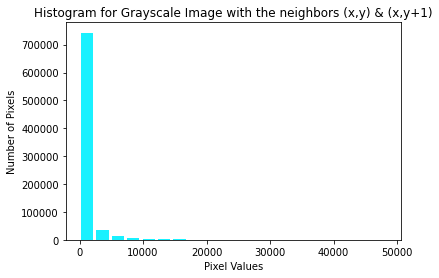

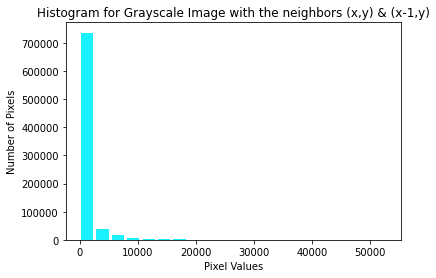

In [9]:
# Histogram Images (Grayscale) for neighbors P_R and P_U
H_gray_1 = Difference_gray_scale('P_R')
S_G_1 = 'Gray_1.png'
Histogram(H_gray_1,'Histogram for Grayscale Image with the neighbors (x,y) & (x,y+1)',S_G_1)
print('\n')
H_gray_2 = Difference_gray_scale('P_U')
S_G_2 = 'Gray_2.png'
Histogram(H_gray_2,'Histogram for Grayscale Image with the neighbors (x,y) & (x-1,y)',S_G_2)


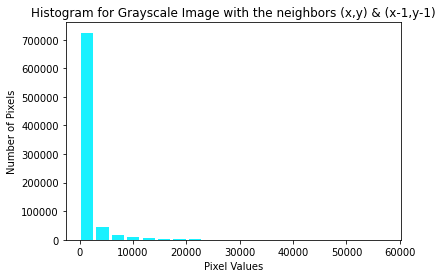

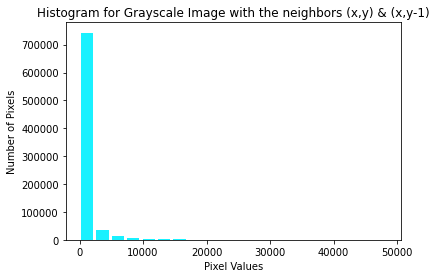

In [10]:
# Histogram Images (Grayscale) for neighbors P_UL and P_Le
H_gray_3 = Difference_gray_scale('P_UL')
S_G_3 = 'Gray_3.png'
Histogram(H_gray_3,'Histogram for Grayscale Image with the neighbors (x,y) & (x-1,y-1)',S_G_3)
print('\n')
H_gray_4 = Difference_gray_scale('P_Le')
S_G_4 = 'Gray_4.png'
Histogram(H_gray_4,'Histogram for Grayscale Image with the neighbors (x,y) & (x,y-1)',S_G_4)

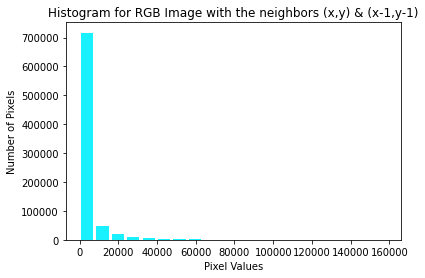

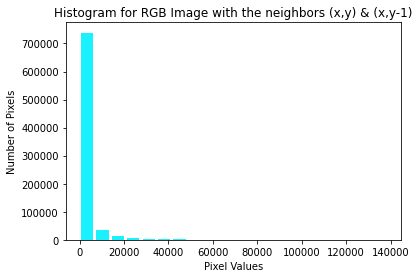

In [11]:
# Histogram Images (RGB) for neighbors P_UL and P_Le
H_RGB_1 = Difference_3channel(W_Image_RGB,'P_UL')
S_R_1 = 'RGB_1.png'
Histogram(H_RGB_1,'Histogram for RGB Image with the neighbors (x,y) & (x-1,y-1)',S_R_1)
print('\n')
H_RGB_2 = Difference_3channel(W_Image_RGB,'P_Le')
S_R_2 = 'RGB_2.png'
Histogram(H_RGB_2,'Histogram for RGB Image with the neighbors (x,y) & (x,y-1)',S_R_2)

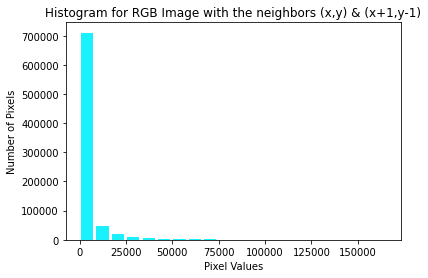

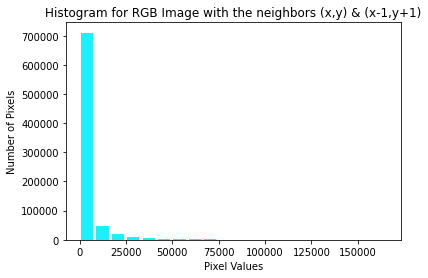

In [12]:
# Histogram Images (RGB) for neighbors P_LL and P_UR
H_RGB_3 = Difference_3channel(W_Image_RGB,'P_LL')
S_R_3 = 'RGB_3.png'
Histogram(H_RGB_3,'Histogram for RGB Image with the neighbors (x,y) & (x+1,y-1)',S_R_3)
print('\n')
H_RGB_4 = Difference_3channel(W_Image_RGB,'P_UR')
S_R_4 = 'RGB_4.png'
Histogram(H_RGB_4,'Histogram for RGB Image with the neighbors (x,y) & (x-1,y+1)',S_R_4)

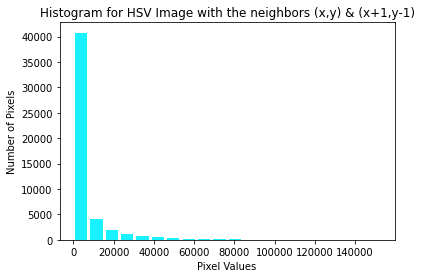

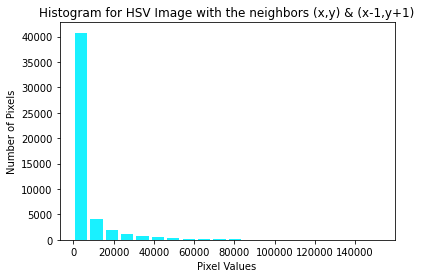

In [13]:
# Histogram Images (HSV) for neighbors P_LL and P_UR
H_HSV_1 = Difference_3channel(W_Image_HSV,'P_LL')
S_H_1 = 'HSV_1.png'
Histogram(H_HSV_1,'Histogram for HSV Image with the neighbors (x,y) & (x+1,y-1)',S_H_1)
print('\n')
H_HSV_2 = Difference_3channel(W_Image_HSV,'P_UR')
S_H_2 = 'HSV_2.png'
Histogram(H_HSV_2,'Histogram for HSV Image with the neighbors (x,y) & (x-1,y+1)',S_H_2)

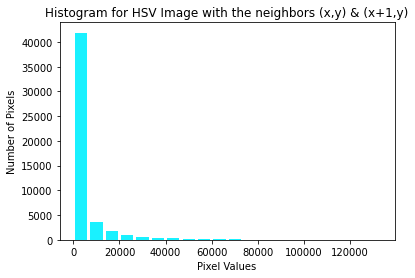

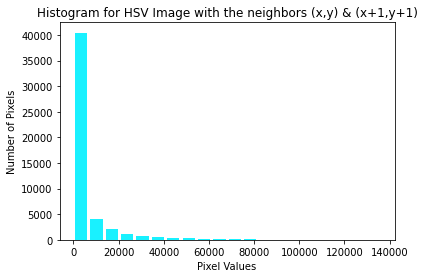

In [14]:
# Histogram Images (HSV) for neighbors P_Lo and P_LR
H_HSV_3 = Difference_3channel(W_Image_HSV,'P_Lo')
S_H_3 = 'HSV_3.png'
Histogram(H_HSV_3,'Histogram for HSV Image with the neighbors (x,y) & (x+1,y)',S_H_3)
print('\n')
H_HSV_4 = Difference_3channel(W_Image_HSV,'P_LR')
S_H_4 = 'HSV_4.png'
Histogram(H_HSV_4,'Histogram for HSV Image with the neighbors (x,y) & (x+1,y+1)',S_H_4)

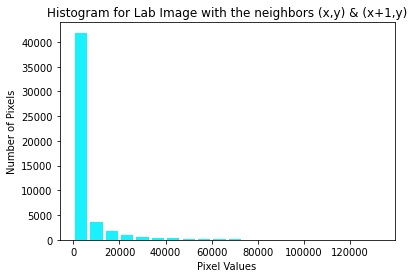

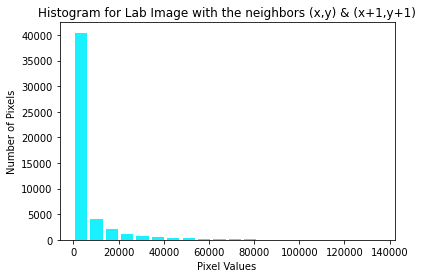

In [15]:
# Histogram Images (Lab) for neighbors P_Lo and P_LR
H_Lab_1 = Difference_3channel(W_Image_Lab,'P_Lo')
S_L_1 = 'Lab_1.png'
Histogram(H_Lab_1,'Histogram for Lab Image with the neighbors (x,y) & (x+1,y)',S_L_1)
print('\n')
H_Lab_2 = Difference_3channel(W_Image_Lab,'P_LR')
S_L_2 = 'Lab_2.png'
Histogram(H_Lab_2,'Histogram for Lab Image with the neighbors (x,y) & (x+1,y+1)',S_L_2)

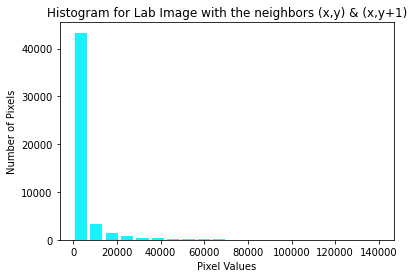

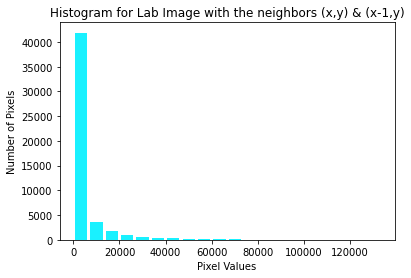

In [16]:
# Histogram Images (Lab) for neighbors P_R and P_U
H_Lab_3 = Difference_3channel(W_Image_Lab,'P_R')
S_L_3 = 'Lab_3.png'
Histogram(H_Lab_3,'Histogram for Lab Image with the neighbors (x,y) & (x,y+1)',S_L_3)
print('\n')
H_Lab_4 = Difference_3channel(W_Image_Lab,'P_U')
S_L_4 = 'Lab_4.png'
Histogram(H_Lab_4,'Histogram for Lab Image with the neighbors (x,y) & (x-1,y)',S_L_4)